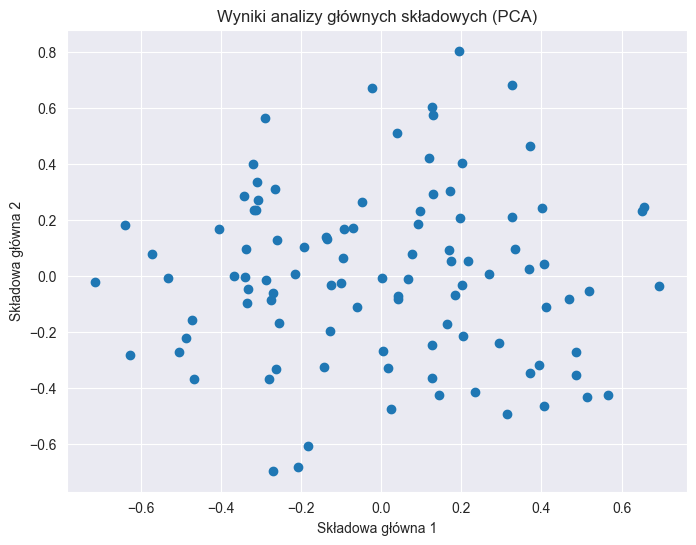

Wyjaśniona wariancja przez każdą z głównych składowych: [0.30280688 0.26882262]


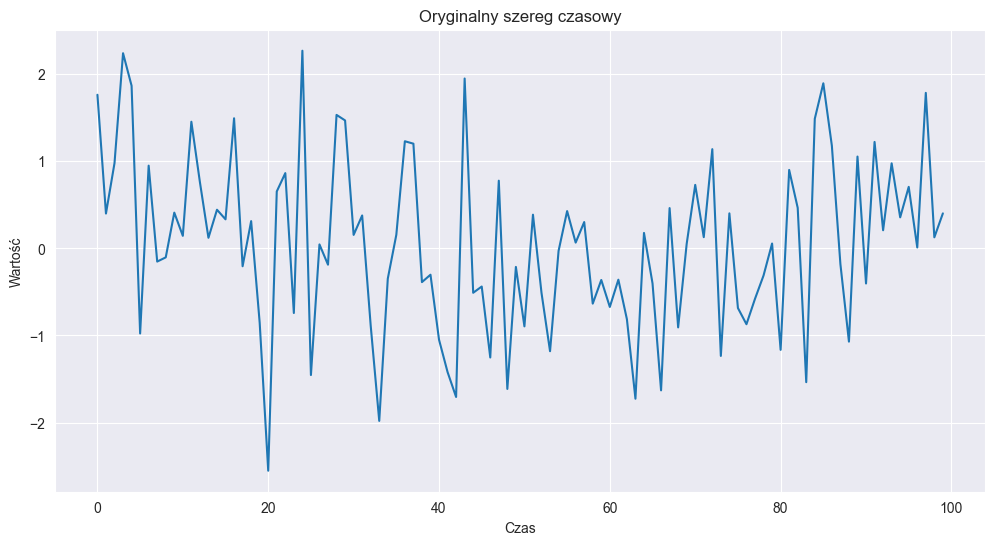

Cechy z dyskretnej transformacji falkowej: [np.float64(1.5303272517789148), np.float64(2.2766230426361873), np.float64(0.6295231031299392), np.float64(0.5647882543903733), np.float64(0.21735023501614686), np.float64(1.1301808444276455), np.float64(0.624172165453287), np.float64(0.5498020813878775), np.float64(0.911404644733399), np.float64(-0.38256459423494804), np.float64(-1.3430582699309666), np.float64(0.08645877942783187), np.float64(0.5765670554174256), np.float64(-0.10000281180097818), np.float64(2.1228321267270696), np.float64(0.3769656574389759), np.float64(-2.0283939372215243), np.float64(-0.13545562376075895), np.float64(1.7201578278106981), np.float64(-0.487641744027732), np.float64(-1.7455432248179887), np.float64(0.17289128821285638), np.float64(-0.6701438230959438), np.float64(-0.3360913916144598), np.float64(-1.2916282069214242), np.float64(-0.3596090978515487), np.float64(-1.1960268001199197), np.float64(0.2829485254831661), np.float64(0.260914709022995), np.float64(-0.

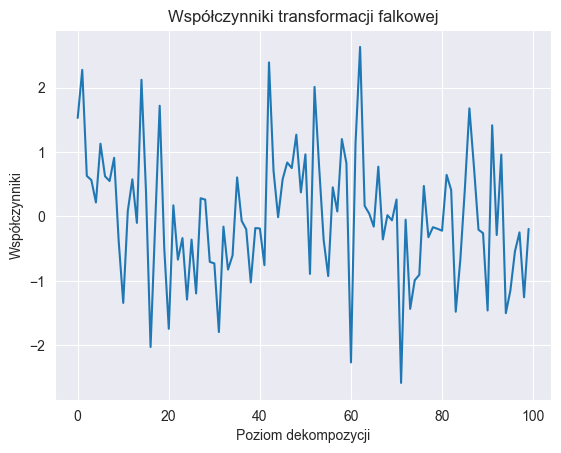

Wartości cech z analizy falkowej (cA): [ 1.53032725  2.27662304  0.6295231   0.56478825  0.21735024  1.13018084
  0.62417217  0.54980208  0.91140464 -0.38256459 -1.34305827  0.08645878
  0.57656706 -0.10000281  2.12283213  0.37696566 -2.02839394 -0.13545562
  1.72015783 -0.48764174 -1.74554322  0.17289129 -0.67014382 -0.33609139
 -1.29162821 -0.3596091  -1.1960268   0.28294853  0.26091471 -0.70503019
 -0.72974382 -1.79564738 -0.1586428  -0.82548783 -0.60482588  0.60674957
 -0.06747576 -0.19973536 -1.02505509 -0.18058601 -0.18690484 -0.75701526
  2.39294931  0.70629696 -0.01152647  0.57931005  0.83786073  0.75161177
  1.27022577  0.37398981]
Wartości cech z analizy falkowej (cD): [ 0.9644195  -0.89247851  2.01160274  0.77883967 -0.36332374 -0.92647247
  0.45209771  0.07791532  1.20154224  0.82530918 -2.26741455  1.13603862
  2.63335072  0.16471513  0.04484503 -0.15783691  0.77287529 -0.35656646
  0.01973594 -0.06012109  0.2626654  -2.58592173 -0.0506132  -1.4356288
 -0.99076802 -0.90677

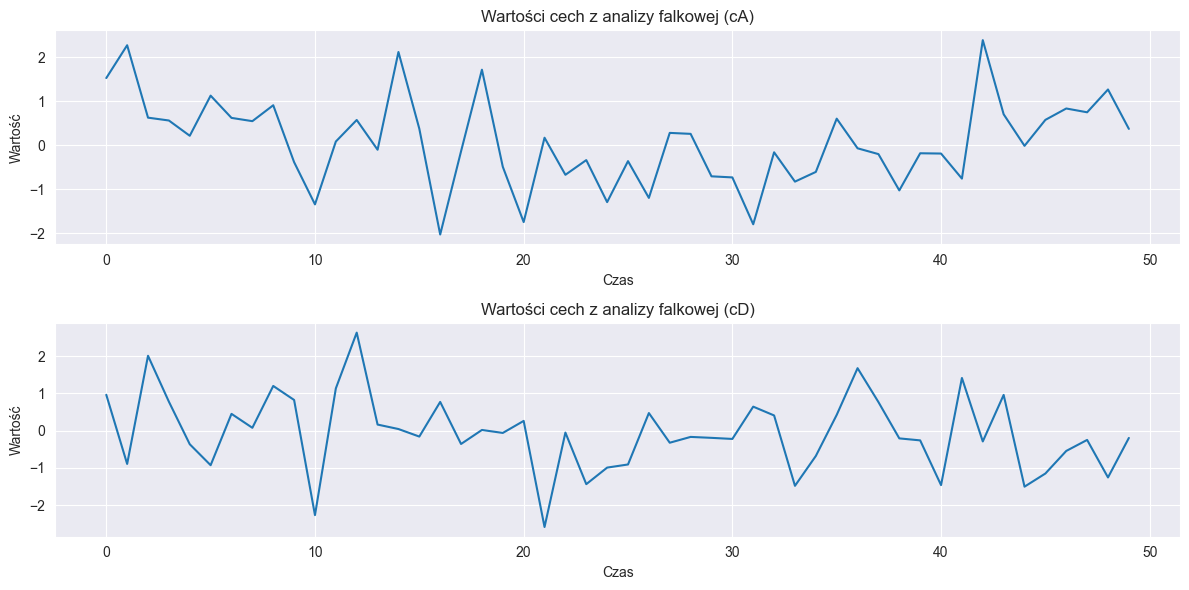

Wartości cech z autokorelacji: [ 1.          0.07149068  0.13664497  0.03486707 -0.0330982   0.02947577
  0.07295543  0.19055283  0.18172587 -0.10907537  0.08437772 -0.04972481
  0.1803898   0.21076136  0.08460036  0.2018417  -0.10940056 -0.07306135
 -0.02333271 -0.02405557  0.03927974]


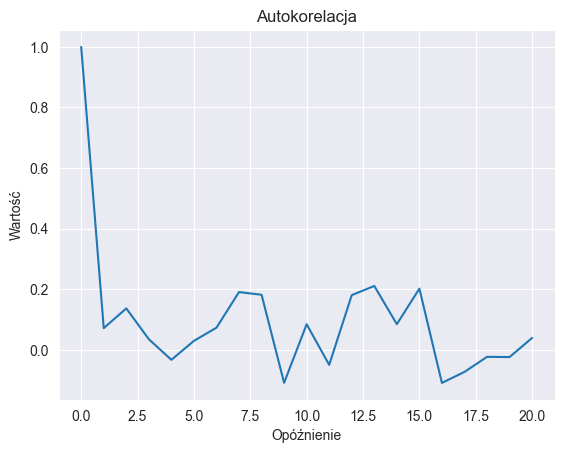

Lokalne maksima (peaks): [ 3  6  9 11 14 16 18 22 24 26 28 31 36 39 43 45 47 49 51 55 57 59 61 64
 67 70 72 74 79 81 85 89 91 93 95 97]
Lokalne minima (valleys): [ 1  5  7 10 13 15 17 20 23 25 27 30 33 38 42 44 46 48 50 53 56 58 60 63
 66 68 71 73 76 80 83 88 90 92 94 96 98]


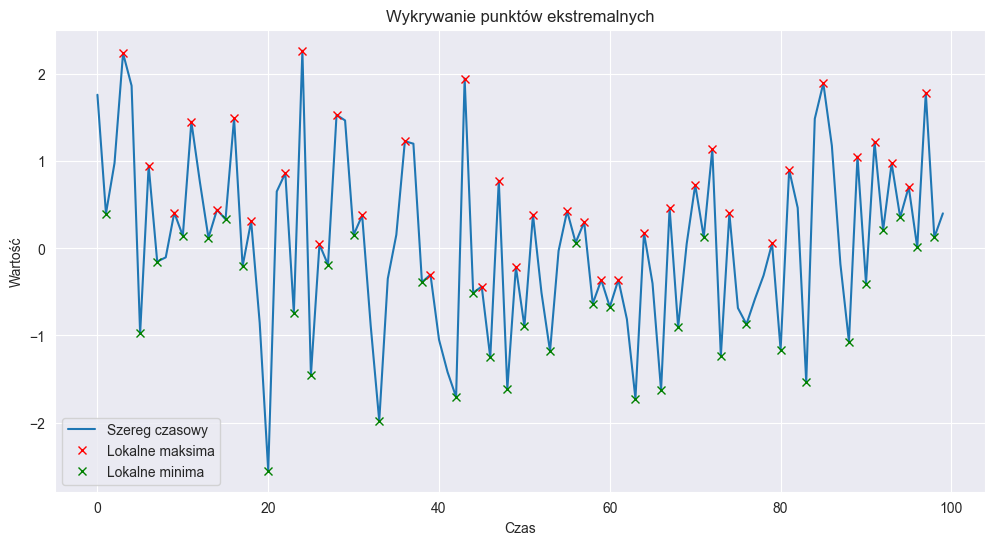

Wartość mediany absolutnego odchylenia (MAD): 1.0054563617920231


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from statsmodels.tsa.stattools import acf
from statsmodels.robust import mad
from sklearn.decomposition import PCA
import pywt  # biblioteka do analizy falkowej (PyWavelets)

# === PCA: analiza głównych składowych ===

# Generowanie przykładowych danych (100 próbek, 4 cechy)
data = np.random.rand(100, 4)

# PCA z redukcją do 2 głównych składowych
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# Wykres wyników PCA
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Wyniki analizy głównych składowych (PCA)')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.grid(True)
plt.show()

# Wyświetlenie, ile wariancji wyjaśnia każda ze składowych
explained_variance_ratio = pca.explained_variance_ratio_
print("Wyjaśniona wariancja przez każdą z głównych składowych:", explained_variance_ratio)

# === Szereg czasowy (syntetyczny) ===

# Generowanie losowego szeregu czasowego
np.random.seed(0)
ts = np.random.randn(100)

# Wykres oryginalnego szeregu czasowego
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Oryginalny szereg czasowy')
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.grid(True)
plt.show()

# === DWT: Dyskretna Transformacja Falkowa ===

# Funkcja ekstrakcji cech z DWT
def dwt_feature_extraction(data, wavelet='haar', level=1):
    coeffs = pywt.wavedec(data, wavelet, level=level)  # dekompozycja falkowa
    features = []
    for i in range(level + 1):
        features.extend(coeffs[i])  # dodanie wszystkich współczynników
    return features

# Ekstrakcja cech za pomocą DWT
dwt_features = dwt_feature_extraction(ts)
print("Cechy z dyskretnej transformacji falkowej:", dwt_features)

# Wykres współczynników DWT
plt.plot(dwt_features)
plt.title('Współczynniki transformacji falkowej')
plt.xlabel('Poziom dekompozycji')
plt.ylabel('Współczynniki')
plt.grid(True)
plt.show()

# === Analiza falkowa (DWT 1 poziomu) ===

# Funkcja do analizy falkowej (cA - przybliżenia, cD - detale)
def wavelet_analysis(data, wavelet='haar'):
    cA, cD = pywt.dwt(data, wavelet)
    return cA, cD

# Wywołanie funkcji analizy falkowej
cA, cD = wavelet_analysis(ts)
print("Wartości cech z analizy falkowej (cA):", cA)
print("Wartości cech z analizy falkowej (cD):", cD)

# Wykresy komponentów cA i cD
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(cA)
plt.title('Wartości cech z analizy falkowej (cA)')
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(cD)
plt.title('Wartości cech z analizy falkowej (cD)')
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Autokorelacja ===

# Funkcja do obliczenia autokorelacji
def autocorrelation(data):
    return acf(data, fft=True)

# Obliczenie autokorelacji
autocorr = autocorrelation(ts)
print("Wartości cech z autokorelacji:", autocorr)

# Wykres autokorelacji
plt.plot(autocorr)
plt.title('Autokorelacja')
plt.xlabel('Opóźnienie')
plt.ylabel('Wartość')
plt.grid(True)
plt.show()

# === Ekstrema lokalne (maksima i minima) ===

# Funkcja wykrywająca lokalne maksima i minima
def find_extremes(data):
    peaks, _ = find_peaks(data)          # lokalne maksima
    valleys, _ = find_peaks(-data)       # lokalne minima (odwrócenie sygnału)
    return peaks, valleys

# Znajdowanie ekstremów
peaks, valleys = find_extremes(ts)
print("Lokalne maksima (peaks):", peaks)
print("Lokalne minima (valleys):", valleys)

# Wykres z zaznaczonymi ekstremami
plt.figure(figsize=(12, 6))
plt.plot(ts, label="Szereg czasowy")
plt.plot(peaks, ts[peaks], "x", label="Lokalne maksima", color='red')
plt.plot(valleys, ts[valleys], "x", label="Lokalne minima", color='green')
plt.title('Wykrywanie punktów ekstremalnych')
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()

# === Mediana absolutnego odchylenia (MAD) ===

# Funkcja obliczająca MAD
def median_absolute_deviation(data):
    return mad(data)

# Obliczenie MAD
mad_value = median_absolute_deviation(ts)
print("Wartość mediany absolutnego odchylenia (MAD):", mad_value)


         Date     DJIA
0   10/7/1896  28.5719
1   10/8/1896  28.4903
2   10/9/1896  28.2166
3  10/10/1896  27.9428
4  10/12/1896  27.6748
Date     object
DJIA    float64
dtype: object
Brakujące wartości:
 Date    0
DJIA    0
dtype: int64
Statystyki opisowe:

               DJIA
count  34708.000000
mean    3991.618266
std     7970.756531
min       27.674800
25%      100.680000
50%      454.920000
75%     2730.787500
max    45014.040000


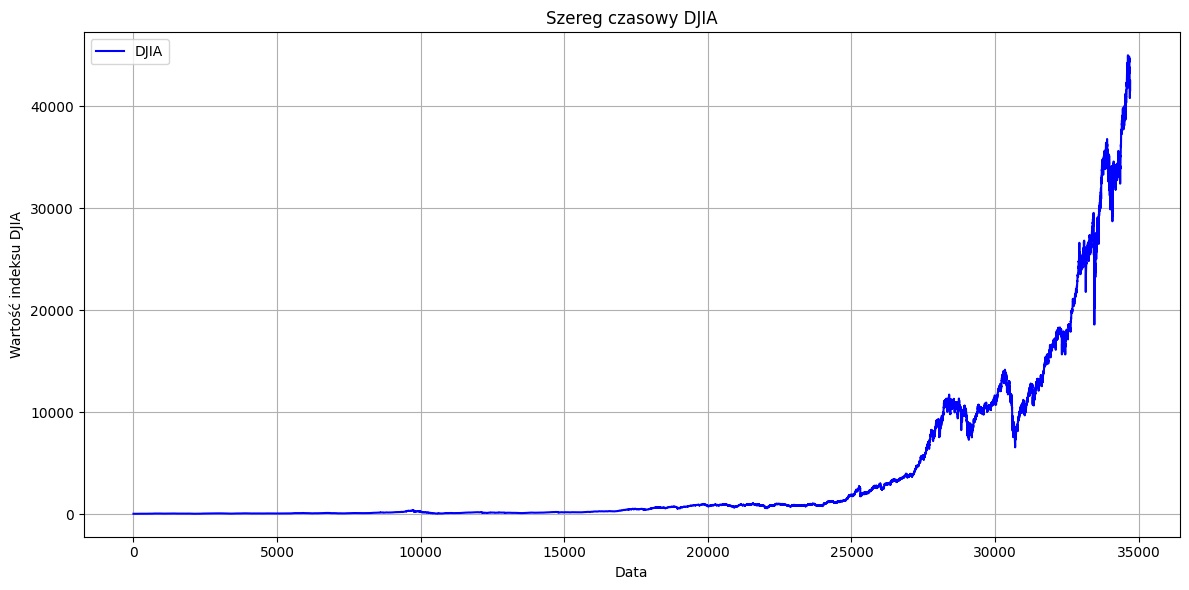

In [12]:
#zadanie2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from statsmodels.sandbox.tsa.example_arma import autocorr

file_path = "DJIA_ClosingValues_1896-10-07-2025-03-28.csv"
df = pd.read_csv(file_path)
print(df.head())

print(df.dtypes)
df['Date'] = pd.to_datetime(df['Date'])
#obsługa brakujących danych
print("Brakujące wartości:\n", df.isna().sum())


print("Statystyki opisowe:\n")
print(df.describe())


#wykres czasowy

plt.figure(figsize=(12, 6))
plt.plot(df['DJIA'], label='DJIA', color='blue')
plt.title('Szereg czasowy DJIA')
plt.xlabel('Data')
plt.ylabel('Wartość indeksu DJIA')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


        Date     Open     High      Low    Close   Volume
0 2015-01-02  48512.0  50005.0  48345.0  50005.0  2882100
1 2015-01-05  47517.0  48512.0  47264.0  48512.0  3866100
2 2015-01-06  48001.0  48061.0  47338.0  47517.0  4559300
3 2015-01-07  49463.0  49882.0  48006.0  48006.0  4408800
4 2015-01-08  49943.0  50261.0  49017.0  49463.0  3621900
5 2015-01-09  48840.0  49955.0  48501.0  49955.0  2999200
6 2015-01-12  48140.0  48840.0  47956.0  48840.0  3246100
7 2015-01-13  48042.0  48939.0  48042.0  48144.0  3881600
8 2015-01-14  47646.0  48281.0  47372.0  48038.0  3697200
9 2015-01-15  48026.0  48853.0  47648.0  47648.0  4463600
Średnia wynosi 92943.62780622292
Mediana wynosi 100299.0
Odchylenie wynosi 27222.033207569373
Minimalna wartość 37501.0
Maksymalna wartość wynosi 137349.0
Skośnosć wynosi -0.36101091604296626
Kurtoza wynosi -1.1779180627648633


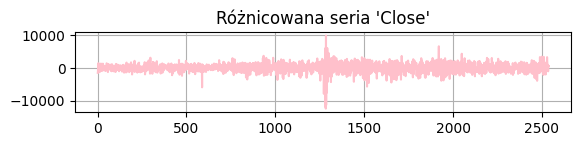

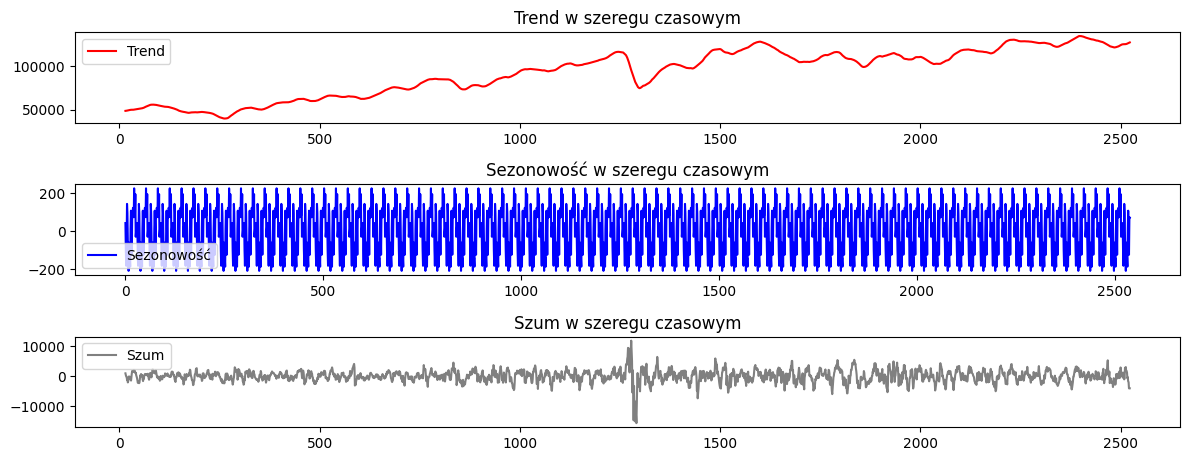

In [26]:
#zadanie3
from scipy.stats import skew, kurtosis
from statsmodels.tsa.seasonal import seasonal_decompose

file_path_2 = 'Bovespa_data_2025-03-31.csv'

df = pd.read_csv(file_path_2, skiprows=2)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
print(df.head(10))

print('Średnia wynosi', df['Close'].mean())
print('Mediana wynosi', df['Close'].median())
print('Odchylenie wynosi', df['Close'].std())
print('Minimalna wartość', df['Close'].min())
print('Maksymalna wartość wynosi', df['Close'].max())
print('Skośnosć wynosi', skew(df['Close'].dropna()))
print('Kurtoza wynosi', kurtosis(df['Close'].dropna()))

#różnicowanie
df_diff  = df['Close'].diff().dropna()
plt.subplot(4, 1, 4)
plt.plot(df_diff, color='pink')
plt.title("Różnicowana seria 'Close'")
plt.grid(True)
plt.show()

decomposition = seasonal_decompose(df['Close'], model='additive', period=30)

#wykres trendu
plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.title('Trend w szeregu czasowym')
plt.legend()

#wykres sezonowości
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Sezonowość', color='blue')
plt.title('Sezonowość w szeregu czasowym')
plt.legend()

#wykres resztowych wartości-szumu
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Szum', color='gray')
plt.title('Szum w szeregu czasowym')
plt.legend()

plt.tight_layout()
plt.show()










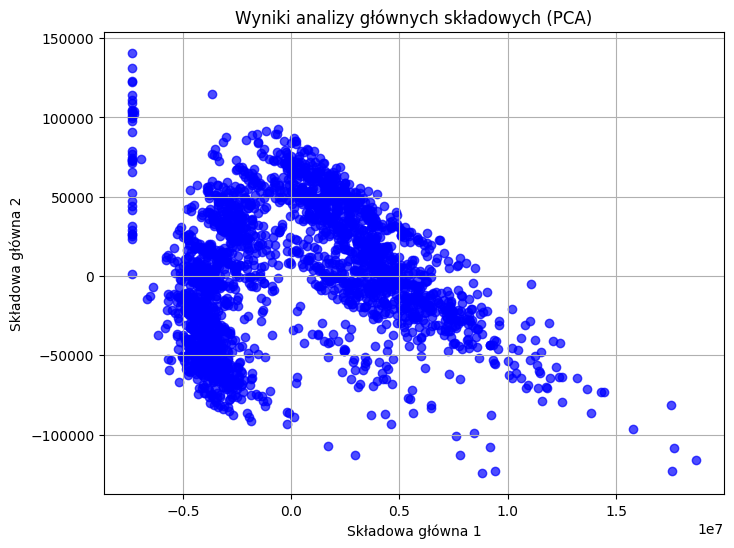

Wyjaśniona wariancja przez każdą z głównych składowych: [9.99903209e-01 9.67160358e-05]


In [37]:
#pca dla zadania 3
from sklearn.decomposition import PCA 

data = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna().values

#PCA z 2 składowymi
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

#PCA
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7, color='blue')
plt.title('Wyniki analizy głównych składowych (PCA)')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.grid(True)
plt.show()

explained_variance_ratio = pca.explained_variance_ratio_
print("Wyjaśniona wariancja przez każdą z głównych składowych:", explained_variance_ratio)





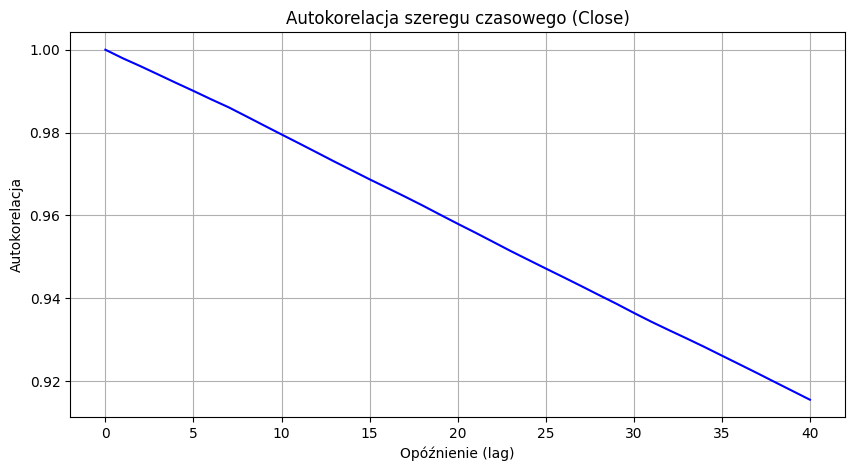

In [42]:
from statsmodels.tsa.stattools import acf 
def autocorrelation(data): 
    return acf(data, fft=True)

# Funkcja do obliczenia autokorelacji
def autocorrelation(data, lags=40):
    return acf(data, nlags=lags, fft=True)

# Obliczenie autokorelacji dla ceny zamknięcia
autocorr = autocorrelation(df['Close'].dropna())

# Wykres autokorelacji
plt.figure(figsize=(10, 5))
plt.plot(autocorr, linestyle='-', color='blue')
plt.title('Autokorelacja szeregu czasowego ')
plt.xlabel('Opóźnienie')
plt.ylabel('Autokorelacja')
plt.grid(True)
plt.show()


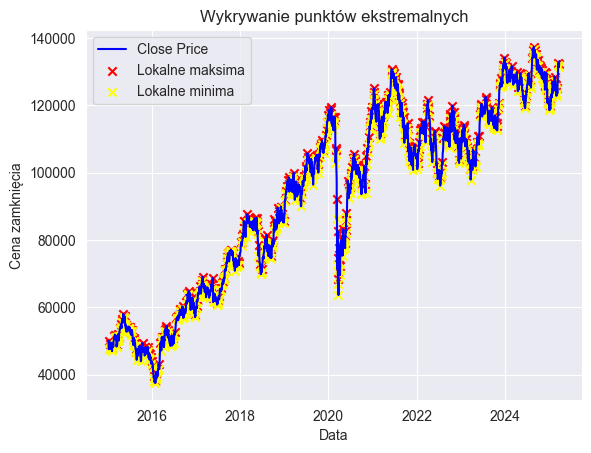

In [9]:
#ekstrema lokalne
from scipy.signal import find_peaks
def find_ekstrema(data):
    peaks, _ = find_peaks(data)  # Lokalne maksima
    valleys, _ = find_peaks(-data)  # Lokalne minima
    return peaks, valleys
# Upewnij się, że usuwasz NaN-y w obu kolumnach równocześnie
df_clean = df[['Date', 'Close']].dropna()

# Znajdź ekstrema tylko w przefiltrowanej serii
peaks, valleys = find_ekstrema(df_clean['Close'].values)

# Wykres
plt.plot(df_clean['Date'], df_clean['Close'], label='Close Price', color='blue')
plt.scatter(df_clean['Date'].iloc[peaks], df_clean['Close'].iloc[peaks],
            color='red', marker='x', label='Lokalne maksima')
plt.scatter(df_clean['Date'].iloc[valleys], df_clean['Close'].iloc[valleys],
            color='yellow', marker='x', label='Lokalne minima')
plt.title('Wykrywanie punktów ekstremalnych')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.legend()
plt.grid(True)
plt.show()



In [44]:
#analiza porównawcza metod ekstrakcji cech

print("\n Statystyki opisowe:")
print("- Średnia i odchylenie standardowe dobrze opisują ogólną zmienność.")
print("- Skośność i kurtoza pokazują asymetrię i spiczastość rozkładu.")
print("\nTransformacje czasowe:")
print("- Różnicowanie pomaga w usuwaniu trendu.")
print("- Dekompozycja oddziela trend i sezonowość, ułatwiając analizę.")
print("\nPCA:")
print("- PCA pokazuje, jak dobrze 2 główne składowe reprezentują dane.")
print(f"- Wyjaśniona wariancja: {explained_variance_ratio}")
print("\n Autokorelacja:")
print("- Pomaga wykryć cykliczność w danych.")
print("\nEkstrema:")
print("- Identyfikują potencjalne punkty zwrotne na rynku.")
print("- Najlepsza metoda zależy od celu: PCA do redukcji wymiarów, autokorelacja do analizy sezonowości, a ekstrema do wykrywania punktów zwrotnych.")



 Statystyki opisowe:
- Średnia i odchylenie standardowe dobrze opisują ogólną zmienność.
- Skośność i kurtoza pokazują asymetrię i spiczastość rozkładu.

Transformacje czasowe:
- Różnicowanie pomaga w usuwaniu trendu.
- Dekompozycja oddziela trend i sezonowość, ułatwiając analizę.

PCA:
- PCA pokazuje, jak dobrze 2 główne składowe reprezentują dane.
- Wyjaśniona wariancja: [9.99903209e-01 9.67160358e-05]

 Autokorelacja:
- Pomaga wykryć cykliczność w danych.

Ekstrema:
- Identyfikują potencjalne punkty zwrotne na rynku.

 WNIOSKI:
- Najlepsza metoda zależy od celu: PCA do redukcji wymiarów, autokorelacja do analizy sezonowości, a ekstrema do wykrywania punktów zwrotnych.


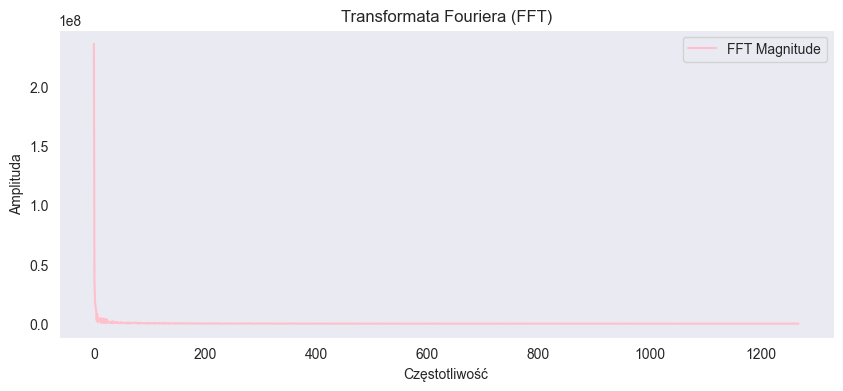

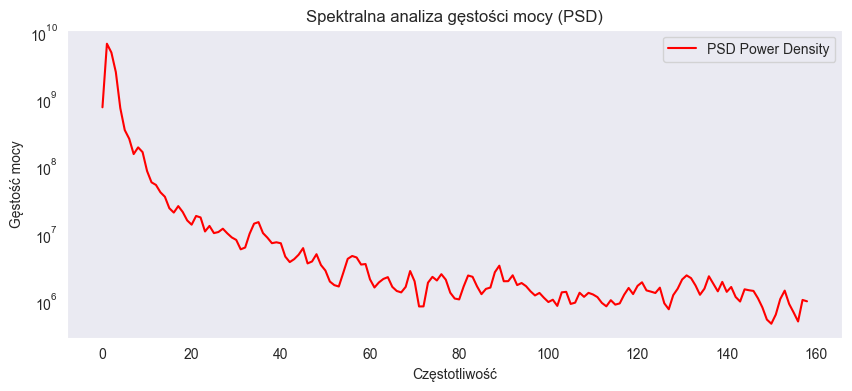

Porównanie wydajności metod:
- FFT: 0.0009996891021728516 s
- PSD: 0.0010006427764892578 s
- Statystyki opisowe (pandas): 0.0 s


In [2]:
#zadanie 4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.signal import welch

file_path_2 = 'Bovespa_data_2025-03-31.csv'
df = pd.read_csv(file_path_2, skiprows=2)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
ts = df['Close'].dropna().values

#Transformata Fouriera - FFT
def fft_features(data):
    start_time = time.time()
    fft_values = np.fft.fft(data)
    fft_magnitude = np.abs(fft_values)[:len(fft_values)//2]  # Tylko pierwsza połowa
    duration = time.time() - start_time
    return fft_magnitude, duration

#spektralna analiza gęstości mocy-PSD
def psd_features(data):
    start_time = time.time()
    frequencies, power_density = welch(data, fs=1.0, nperseg=len(data)//8) 
    duration = time.time() - start_time
    return power_density, duration

#metody pandas
def pandas_stats(data):
    start_time = time.time()
    mean = np.mean(data)
    std = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    duration = time.time() - start_time
    return (mean, std, min_val, max_val), duration

fft_result, fft_time = fft_features(ts)
psd_result, psd_time = psd_features(ts)
stats_result, stats_time = pandas_stats(ts)

plt.figure(figsize=(10, 4))
plt.plot(fft_result, label="FFT Magnitude", color="pink")
plt.title("Transformata Fouriera (FFT)")
plt.xlabel("Częstotliwość")
plt.ylabel("Amplituda")
plt.legend()
plt.grid()
plt.show()

#wykres PSD
plt.figure(figsize=(10, 4))
plt.semilogy(psd_result, label="PSD Power Density", color="red")
plt.title("Spektralna analiza gęstości mocy (PSD)")
plt.xlabel("Częstotliwość")
plt.ylabel("Gęstość mocy")
plt.legend()
plt.grid()
plt.show()


print("Porównanie wydajności metod:")
print(f"- FFT: {fft_time:} s")
print(f"- PSD: {psd_time:} s")
print(f"- Statystyki opisowe (pandas): {stats_time:} s")

